In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Import our data into pandas from CSV
string_thing = 'school_data.csv'
school_data_df = pd.read_csv(string_thing, low_memory=False)
school_data_df.head()

,Unnamed: 0,Name,City,State,School Ownership,Number of Undergraduate Students,Share of Female Students,Share of Male Students,Share of Undergraduates Aged 25 and Above,Average Age of Entry,Admission Rate,Completion Rate,Median Earnings of Students 10 Years After Entry,Median Debt for Students Who Have Completed,Share of Students Who Received a Federal Loan,Median Family Income,Average Cost of Attendance,Average Faculty Salary,Net Tuition Revenue per Student
0,0,University of Phoenix-Arizona,Tempe,AZ,3,77269,0.697281,0.302719,0.8601,32.0,NaN,0.1433,47100.0,31977.0,0.842856,18602.0,20083.0,4485.0,13180
1,1,Southern New Hampshire University,Manchester,NH,2,68214,0.676671,0.323329,0.7502,31.0,0.7805,0.4880,45400.0,18347.5,0.929532,27192.0,49005.0,8012.0,10531
2,2,University of Central Florida,Orlando,FL,1,56366,0.589145,0.410855,0.1791,23.0,0.4990,0.7001,45400.0,18130.0,0.698146,31400.0,20950.0,9881.0,5720
3,3,Texas A & M University-College Station,College Station,TX,1,52568,0.511678,0.488322,0.0297,20.0,0.7054,0.8210,58000.0,18519.5,0.804655,58904.0,28143.0,11165.0,10518
4,4,Miami Dade College,Miami,FL,1,51015,0.581050,0.418950,0.2815,22.0,NaN,0.3119,31100.0,8750.0,0.085088,18391.0,12476.0,7102.0,1729


In [4]:
school_data_df['Median Family Income'].max()

121852.0

In [5]:
school_data_df['Median Family Income'].min()

0.0

In [6]:
school_data_df['Median Earnings of Students 10 Years After Entry'].max()

116000.0

In [7]:
school_data_df['Median Earnings of Students 10 Years After Entry'].min()

17400.0

In [8]:
input_df = school_data_df[['Name','State','Median Family Income','Median Earnings of Students 10 Years After Entry']]

In [9]:
input_df.dropna(how='any',inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
input_df.head()

,Name,State,Median Family Income,Median Earnings of Students 10 Years After Entry
0,University of Phoenix-Arizona,AZ,18602.0,47100.0
1,Southern New Hampshire University,NH,27192.0,45400.0
2,University of Central Florida,FL,31400.0,45400.0
3,Texas A & M University-College Station,TX,58904.0,58000.0
4,Miami Dade College,FL,18391.0,31100.0


In [11]:
Family_Income = input_df['Median Family Income']
Family_Income.head()

0    18602.0
1    27192.0
2    31400.0
3    58904.0
4    18391.0
Name: Median Family Income, dtype: float64

In [12]:
Student_Earning = input_df['Median Earnings of Students 10 Years After Entry']
Student_Earning.head()

0    47100.0
1    45400.0
2    45400.0
3    58000.0
4    31100.0
Name: Median Earnings of Students 10 Years After Entry, dtype: float64

In [13]:
# Get linear regression values
Earnings_Slope, Earnings_Int, Earnings_R, Earnings_P, Earnings_StdErr = stats.linregress(Family_Income, Student_Earning)
Earnings_Fit = Earnings_Slope * Family_Income + Earnings_Int

<IPython.core.display.Javascript object>


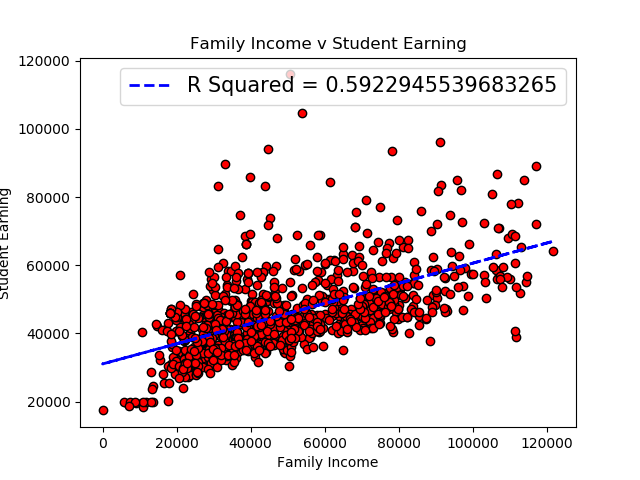

In [14]:
# Tell matplotlib to create a scatter plot based upon the above data

plt.figure(0)
plt.scatter(Family_Income, Student_Earning, marker="o", facecolors="red", edgecolors="black")
plt.plot(Family_Income, Earnings_Fit, 'b--', linewidth=2)
plt.legend(['R Squared = ' + str(Earnings_R)], fontsize=15)


In [15]:
# Create a title, x label, and y label for our chart
plt.title("Family Income v Student Earning")
plt.xlabel("Family Income")
plt.ylabel("Student Earning")

Text(0, 0.5, 'Student Earning')

In [16]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("StudentIncome.png")
plt.show()

In [17]:
grp_by_st = input_df.groupby('State').mean()
grp_by_st = grp_by_st.reset_index()
grp_by_st.head()

,State,Median Family Income,Median Earnings of Students 10 Years After Entry
0,AK,34746.000000,42050.000000
1,AL,40028.352941,38394.117647
2,AR,36398.272727,35127.272727
3,AZ,33840.818182,47336.363636
4,CA,39800.568966,52841.379310


<IPython.core.display.Javascript object>


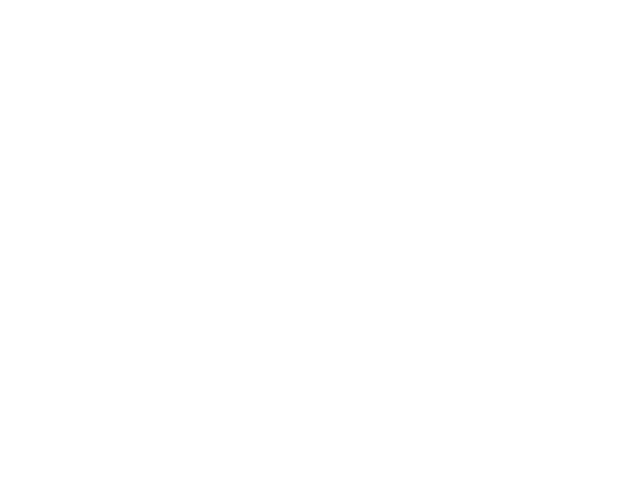

<IPython.core.display.Javascript object>


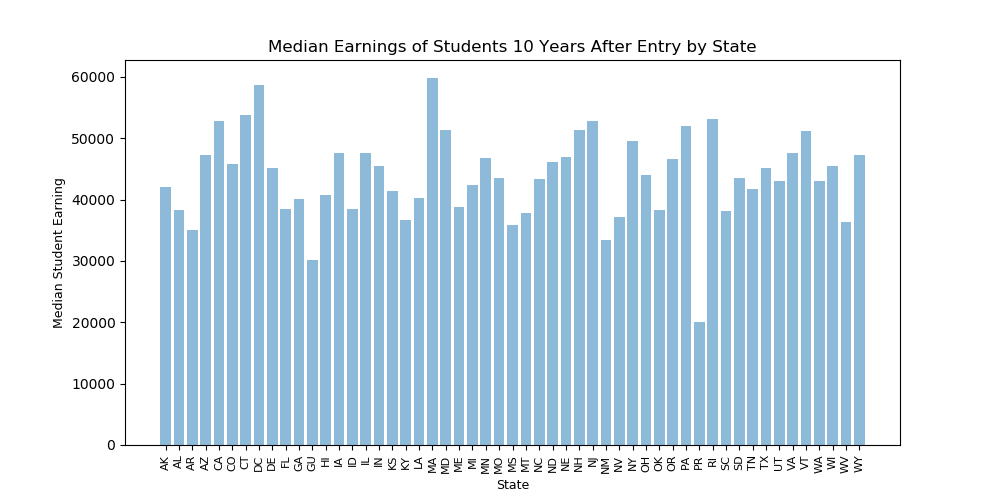

In [18]:
index = np.arange(len(grp_by_st['State']))
earnings = grp_by_st['Median Earnings of Students 10 Years After Entry']

plt.figure(1)
plt.figure(figsize=(10,5))
plt.bar(index, earnings, align='center', alpha=0.5)
plt.xticks(index, grp_by_st['State'], fontsize=8, rotation=90)
plt.xlabel('State', fontsize=9)
plt.ylabel('Median Student Earning', fontsize=9)
plt.title('Median Earnings of Students 10 Years After Entry by State')
plt.savefig("Student_Earning_Bar_Chart.png")
plt.show()